In [140]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats.mstats import mode
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [141]:
#df = pd.read_csv('Crimes_Chicago.csv',names=['ID','case_no','date','block','IUCR','type','description','location',\
#'arrest','domestic','beat','district','ward','community','fbi_code','x_coord','y_coord','year','updated_on',\
#'latitude','longitude','location1'])

df = pd.read_csv('Crimes_Chicago.csv')

In [142]:
df.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [143]:
# I will only use years 2013-2015 inclusive:
df_new_0 = df.loc[df['Year'] != 2016]
df_new_1 = df_new_0.loc[~df_new_0['Ward'].isnull()]
df_new = df_new_1.loc[~df_new_1['Community Area'].isnull()]

In [144]:
# Nice, it looks like crime has reduced in the last three years!
items_counts = df_new['Year'].value_counts()
items_counts

2013    306590
2014    274263
2015    262346
Name: Year, dtype: int64

In [145]:
type_counts = df_new['Primary Type'].value_counts()
print type_counts

THEFT                                190276
BATTERY                              152335
CRIMINAL DAMAGE                       87309
NARCOTICS                             86757
OTHER OFFENSE                         52433
ASSAULT                               51898
BURGLARY                              45636
DECEPTIVE PRACTICE                    43577
MOTOR VEHICLE THEFT                   32575
ROBBERY                               31259
CRIMINAL TRESPASS                     22069
WEAPONS VIOLATION                      9717
PUBLIC PEACE VIOLATION                 8459
OFFENSE INVOLVING CHILDREN             6819
PROSTITUTION                           4599
INTERFERENCE WITH PUBLIC OFFICER       3986
CRIM SEXUAL ASSAULT                    3866
SEX OFFENSE                            2863
HOMICIDE                               1337
GAMBLING                               1299
ARSON                                  1214
LIQUOR LAW VIOLATION                   1152
KIDNAPPING                      

In [146]:
df_new['Community Area'].unique()

array([ 43.,  27.,   6.,  29.,  25.,  19.,   8.,  65.,  23.,  59.,  11.,
        42.,  66.,  76.,  26.,  67.,  44.,  16.,  48.,  28.,  46.,  68.,
        71.,  24.,   3.,  61.,  73.,   4.,  64.,  21.,  38.,  35.,  69.,
        39.,  40.,  32.,  53.,   2.,  22.,   1.,  15.,   7.,  51.,  33.,
        49.,  10.,  60.,  56.,  58.,  20.,  77.,  54.,  30.,  63.,  45.,
        14.,  70.,  17.,  57.,  75.,  55.,  62.,  31.,  36.,  37.,   5.,
        34.,  74.,  18.,  47.,  52.,   9.,  41.,  13.,  72.,  50.,  12.])

In [167]:
# Question 1: Where is narcotics the most common crime?
# Question 2:In which wharf is sex offense more common relative to theft?
# Question 3: How likely is it that you get arrested if you are a sex offender in Chicago, depending on the Com. Area?
# Question 4: How likely is it that you get arrested if you are a sex offender in Chicago, given that it was a domestic offense?
# Question 5: How likely is it that you get arrested if you are a narcotics offender in Chicago, depending on the Com. Area?
# Question 6: How likely is it that you get arrested if you are a narcotics offender in Chicago, given that you are caught in the street?

sex_offense_ratio = []
narcotics_ratio = []
ratio_arrests_sex = []
ratio_arrests_narcotics = []
for com_area in df_new['Community Area'].unique():
    com_table = df_new.loc[df_new['Community Area'] == com_area]
    counts = com_table['Primary Type'].value_counts()
    #print com_area
    if (counts.keys()[0] == 'NARCOTICS'): print "NARCOTICS is the most common crime in Community Area ",com_area
    theft_table =  com_table[com_table['Primary Type'] == 'THEFT']
    sex_offense_table =  com_table[com_table['Primary Type'] == 'SEX OFFENSE']
    narcotics_table = com_table[com_table['Primary Type'] == 'NARCOTICS']
    theft_counts = theft_table['Primary Type'].value_counts()
    sex_counts = sex_offense_table['Primary Type'].value_counts()
    narcotics_counts = narcotics_table['Primary Type'].value_counts()
    #print "Sex offenses ending in arrest: ", len(sex_offense_table[sex_offense_table['Arrest']==True])
    #print com_area,"Ratio of arrests for Sex offenses: ", len(sex_offense_table[sex_offense_table['Arrest']==True])/sex_counts.values[0].astype(float)
    ratio_arrests_sex.append(len(sex_offense_table[sex_offense_table['Arrest']==True])/sex_counts.values[0].astype(float))
    ratio_arrests_narcotics.append(len(narcotics_table[narcotics_table['Arrest']==True])/narcotics_counts.values[0].astype(float))
    #print ward, theft_counts.values[0].astype(float), sex_counts.values[0].astype(float),sex_counts.values[0].astype(float)/theft_counts.values[0].astype(float)
    sex_offense_ratio.append(sex_counts.values[0].astype(float)/theft_counts.values[0].astype(float))
    narcotics_ratio.append(narcotics_counts.values[0].astype(float)/theft_counts.values[0].astype(float))

print "The maximum ratio of sex offenses to thefts is %f and it happens in Community Area %f" % (max(sex_offense_ratio),df_new['Community Area'].unique()[argmax(sex_offense_ratio)])
print "The minimum ratio of sex offenses to thefts is %f and it happens in Community Area %f" % (min(sex_offense_ratio),df_new['Community Area'].unique()[argmin(sex_offense_ratio)])

print "The maximum ratio of narcotic offenses to thefts is %f and it happens in Community Area %f" % (max(narcotics_ratio),df_new['Community Area'].unique()[argmax(narcotics_ratio)])
print "The minimum ratio of narcotic offenses to thefts is %f and it happens in Community Area %f" % (min(narcotics_ratio),df_new['Community Area'].unique()[argmin(narcotics_ratio)])
#for i, community in enumerate(df_new['Community Area'].unique()):
#    print "The ratio of sex offenses to thefts in Community Area %f is %f" % (sex_offense_ratio[i],community)




NARCOTICS is the most common crime in Community Area  27.0
NARCOTICS is the most common crime in Community Area  29.0
NARCOTICS is the most common crime in Community Area  25.0
NARCOTICS is the most common crime in Community Area  23.0
NARCOTICS is the most common crime in Community Area  26.0
The maximum ratio of sex offenses to thefts is 0.045176 and it happens in Community Area 58.000000
The minimum ratio of sex offenses to thefts is 0.005587 and it happens in Community Area 37.000000
The maximum ratio of narcotic offenses to thefts is 3.567641 and it happens in Community Area 26.000000
The minimum ratio of narcotic offenses to thefts is 0.030887 and it happens in Community Area 7.000000


The plot below shows that narcotics crimes are about 10 times more common than sex crimes relative to theft. However, in the community areas where sex offenses reach a maximum, they are just as common as narcotics crimes in the community areas where narcotics crime is minimum

(array([  3.,   4.,   8.,  11.,  19.,  13.,  13.,   1.,   3.,   2.]),
 array([-1.51021904, -1.30395903, -1.09769901, -0.891439  , -0.68517898,
        -0.47891897, -0.27265895, -0.06639894,  0.13986108,  0.34612109,
         0.55238111]),
 <a list of 10 Patch objects>)

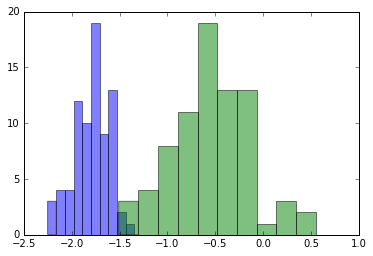

In [168]:
plt.hist(log10(sex_offense_ratio),alpha=.5)
plt.hist(log10(narcotics_ratio),alpha=.5)

The plot below shows that it is almost certain to be arrested if you commit a narcotics offense, whereas on average you only get arrested for sex offenses 20% of the time. Unless you live in Community Area 37, in which case you will almost certainly be arrested for a sex offense, or in Community Area 45, where you can be a sex offender without being arrested.

The maximum ratio of arrests per sex crime is 1.000000 and it happens in Community Area 37.000000
The minimum ratio of sex offenses to thefts is 0.000000 and it happens in Community Area 45.000000
The maximum ratio of arrests per narcotics offense is 1.000000 and it happens in Community Area 6.000000
The minimum ratio of narcotic offenses to thefts is 0.931373 and it happens in Community Area 33.000000


(array([  1.,   1.,   0.,   0.,   3.,   3.,   5.,   7.,  10.,  47.]),
 array([ 0.93137255,  0.93823529,  0.94509804,  0.95196078,  0.95882353,
         0.96568627,  0.97254902,  0.97941176,  0.98627451,  0.99313725,  1.        ]),
 <a list of 10 Patch objects>)

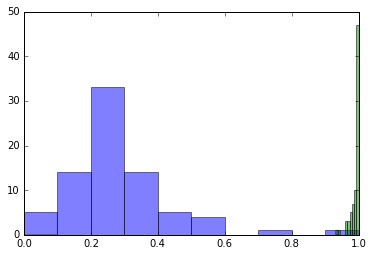

In [169]:
print "The maximum ratio of arrests per sex crime is %f and it happens in Community Area %f" % (max(ratio_arrests_sex),df_new['Community Area'].unique()[argmax(ratio_arrests_sex)])
print "The minimum ratio of sex offenses to thefts is %f and it happens in Community Area %f" % (min(ratio_arrests_sex),df_new['Community Area'].unique()[argmin(ratio_arrests_sex)])

print "The maximum ratio of arrests per narcotics offense is %f and it happens in Community Area %f" % (max(ratio_arrests_narcotics),df_new['Community Area'].unique()[argmax(ratio_arrests_narcotics)])
print "The minimum ratio of narcotic offenses to thefts is %f and it happens in Community Area %f" % (min(ratio_arrests_narcotics),df_new['Community Area'].unique()[argmin(ratio_arrests_narcotics)])

plt.hist(ratio_arrests_sex,alpha=.5)
plt.hist(ratio_arrests_narcotics,alpha=.5)

In [189]:
# How likely to be arrested for sex offense given that it is domestic? (regardless of CA)

sex_offense_table =  df_new[df_new['Primary Type'] == 'SEX OFFENSE']
total_number = sex_offense_table['Primary Type'].value_counts()
total_number.values[0].astype(float)

table_domestic = sex_offense_table[sex_offense_table['Domestic']==True]
table_non_domestic = sex_offense_table[sex_offense_table['Domestic']==False]

print "Total: ", total_number.values[0].astype(float)
print "Domestic: ", len(sex_offense_table[sex_offense_table['Domestic']==True])
print "Non-domestic: ", len(sex_offense_table[sex_offense_table['Domestic']==False])

print "Probability of arrest if sex offense is at home: ", 1.0*len(table_domestic[table_domestic['Arrest']==True])/\
(1.0*(len(sex_offense_table[sex_offense_table['Domestic']==True])))

print "Probability of arrest if sex offense is in the street: ",1.0*len(table_non_domestic[table_non_domestic['Arrest']==True])/\
(1.0*(len(sex_offense_table[sex_offense_table['Domestic']==False])))


Total:  2863.0
Domestic:  299
Non-domestic:  2564
Probability of arrest if sex offense is at home:  0.177257525084
Probability of arrest if sex offense is in the street:  0.264430577223


The numbers above show that sex violence gets punished less severely if it is committed at home. 

**A model for geographical distribution of narcotics-related crimes**

I model the intensity map by dividing the map of chicago in cells of width w and byassuming that crimes happend in each cell according to a Poisson process $Pois(w^2\lambda i)$ that is conditioned on $\lambda$. This $\lambda$ is the intensity surface we are trying to estimate. In each cell $i$, the number of crimes over the full period 2013-2015 is represented by $Y_i$. I assume that $\lambda_i$ is equivalent to $exp[\alpha+Z_i]$ where $Z$ is drawn from a multivariate normal distribution $MVN(0,\Sigma)$, where $\Sigma$ comes from a squared exponential kernel, and $\alpha$ is drawn according to a N(0,1) distribution. The square exponential kernel is such that the covariances decay exponentially quickly as points get further apart from each other. That is $$\Sigma_{ij} = \sigma^2Exp[-||X_i-X_j||_2^2/\phi]$$. This means that the $\lambda_i$ are correlated according to the covariance $\Sigma$. This is expected, since we expect narcotics crimes to be geographically correlated (In fact this seem already the case if we look at the map.)

In [596]:
df_geo_0 = df_new.loc[df_new['Year'] == 2015]
df_geo_1 = df_geo_0.loc[(~df_geo_0['Latitude'].isnull()) | (~df_geo_0['Longitude'].isnull())]
df_geo = df_geo_1.loc[df_geo_1['Latitude'] > 41.]

#print df_geo_1['Latitude'].values

In [597]:
geo_dist_theft = df_geo.loc[df_geo['Primary Type'] == 'THEFT']
geo_dist_sex = df_geo.loc[df_geo['Primary Type'] == 'SEX OFFENSE']
geo_dist_narco = df_geo.loc[df_geo['Primary Type'] == 'NARCOTICS']

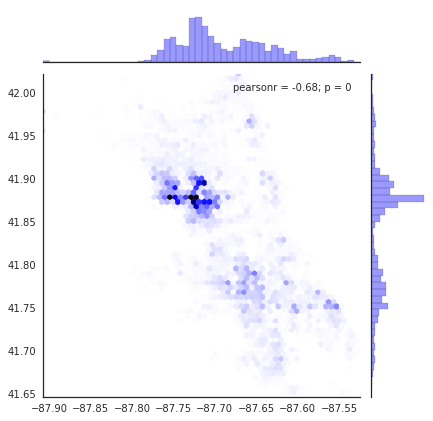

In [598]:
import seaborn as sns

# First plot the 

with sns.axes_style("white"):
    sns.jointplot(x=geo_dist_narco['Longitude'].values, y=geo_dist_narco['Latitude'].values, kind="hex", color="blue");

0.008


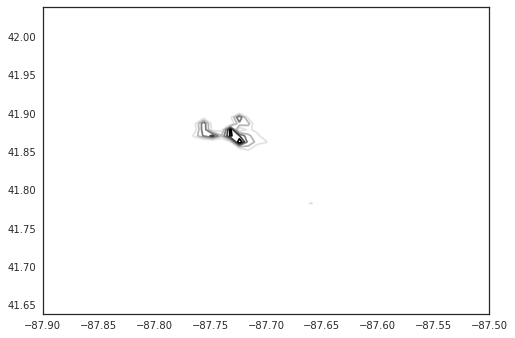

In [599]:
# Resample to make set smaller
longi = geo_dist_narco['Longitude'].values
lati = geo_dist_narco['Latitude'].values



# Create grid of counts:
x0 = linspace(-87.90,-87.90+0.4,51)
y0 = linspace(41.64,41.64+0.4,51)

print x0[1]-x0[0]

#print min(x0),max(x0)
#print min(y0),max(y0)

#print x0[0],x0[1]

s = (len(x0),len(y0))
counts=np.zeros(s)

for i in arange(len(x0)-1):
    for j in arange(len(y0)-1):
        counts[i,j] = size(where(((longi > x0[i]) & (longi <= x0[i+1])) & ((lati > y0[j]) & (lati <= y0[j+1]))))
        #print x0[i],y0[j],counts[i,j]

counts = counts.T
plt.contour(x0,y0,counts)
#plt.hist(longi)

In [660]:
counts = reshape(counts,len(x0)*len(y0),'F')
print shape(counts)

print argmax(counts),counts[argmax(counts)]
#print counts[1000:1400]

(2601,)
1150 560.0


In [662]:
# Resample to make set smaller
longi = geo_dist_narco['Longitude'].values
lati = geo_dist_narco['Latitude'].values

# I set M to the length of the vector containing all narcotics events.
M = counts.size

# Array of coordinates
X = []

for i in arange(len(x0)):
    for j in arange(len(y0)):
        X.append([x0[i],y0[j]])

X =  np.array(X)

# Set the size of the cell
w = 0.008

print M
print X

for i in arange(2601):
    print i,X[i],counts[i]

2601
[[-87.9    41.64 ]
 [-87.9    41.648]
 [-87.9    41.656]
 ..., 
 [-87.5    42.024]
 [-87.5    42.032]
 [-87.5    42.04 ]]
0 [-87.9   41.64] 0.0
1 [-87.9    41.648] 0.0
2 [-87.9    41.656] 0.0
3 [-87.9    41.664] 0.0
4 [-87.9    41.672] 0.0
5 [-87.9   41.68] 0.0
6 [-87.9    41.688] 0.0
7 [-87.9    41.696] 0.0
8 [-87.9    41.704] 0.0
9 [-87.9    41.712] 0.0
10 [-87.9   41.72] 0.0
11 [-87.9    41.728] 0.0
12 [-87.9    41.736] 0.0
13 [-87.9    41.744] 0.0
14 [-87.9    41.752] 0.0
15 [-87.9   41.76] 0.0
16 [-87.9    41.768] 0.0
17 [-87.9    41.776] 0.0
18 [-87.9    41.784] 0.0
19 [-87.9    41.792] 0.0
20 [-87.9  41.8] 0.0
21 [-87.9    41.808] 0.0
22 [-87.9    41.816] 0.0
23 [-87.9    41.824] 0.0
24 [-87.9    41.832] 0.0
25 [-87.9   41.84] 0.0
26 [-87.9    41.848] 0.0
27 [-87.9    41.856] 0.0
28 [-87.9    41.864] 0.0
29 [-87.9    41.872] 0.0
30 [-87.9   41.88] 0.0
31 [-87.9    41.888] 0.0
32 [-87.9    41.896] 0.0
33 [-87.9    41.904] 0.0
34 [-87.9    41.912] 0.0
35 [-87.9   41.92] 0.0
3

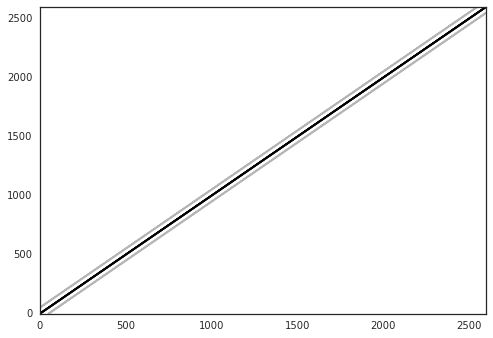

In [602]:
# Let us set up the latent variables that determine the covariance matrix

phi = .0001
#s = 1.

Sigma = np.zeros((M+1,M+1))
Sigma[0,0] = 1. 
for i in range(0,M):
    for j in range(0,M):
        #print X[i,:]-X[j,:]
        Sigma[i+1,j+1] = np.exp(-np.linalg.norm(X[i,:]-X[j,:])**2/phi)
        
plt.contour(Sigma)

In [603]:
Test = Sigma[1:,1:]
Tau = np.linalg.inv(Test)

offset = np.eye(M)*0.1
Tau = Tau + offset

print Sigma.max()
print Sigma.min()

print Tau.max()
print Tau.min()

_ = np.linalg.cholesky(Tau)

print shape(X)
print shape(counts)
print M

1.0
0.0
7.66438576946
-4.96218650291
(2601, 2)
(2601,)
2601


In [616]:
import pymc as pm

Z = pm.MvNormal(name='MVN', mu=[0]*M, tau=Tau)
alpha = pm.Normal(name='alpha', mu=0, tau=1.)

@pm.deterministic
def lambdas(Z=Z, a=alpha, w=.008):
    return np.exp(a+Z)*(w**2)

likelihood = pm.Poisson(name='likelihood', mu=lambdas, value=counts, observed=True)

In [617]:
#m = pm.Model([Z, alpha, lambdas, likelihood])
#mc = pm.MCMC(m)
#mc.sample(iter=100000, burn=20000)

 [-----------------100%-----------------] 100000 of 100000 complete in 15313.8 sec

In [704]:
def plot_counts(counts):
    colors = counts / np.double(np.max(counts))
    #plt.contour(colors)
    CS = plt.scatter(X[:,0], X[:,1], s=20, c=colors, cmap='YlOrRd', edgecolors='none')
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    CB.set_label('x 200/cell/year',size=15)
    plt.xlabel('Longitude',size=20)
    plt.ylabel('Latitude',size=20)
    plt.title('Predicted number of narcotic crimes',size=20)
    plt.savefig('Posterior_means.jpg')

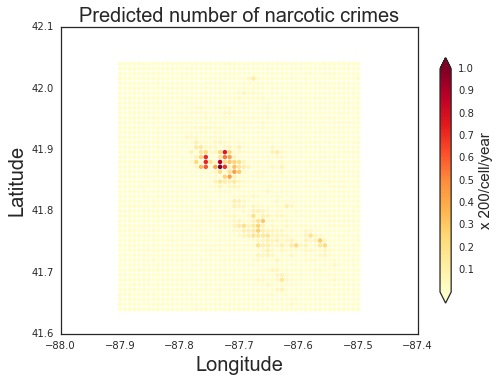

In [705]:
posterior_pymc = np.mean(lambdas.trace(), axis=0)
plot_counts(posterior_pymc)

In [655]:
print shape(lambdas.trace())
#for i in arange(1400,1600):
#    print i, mean(lambdas.trace()[:,i])

(80000, 2601)


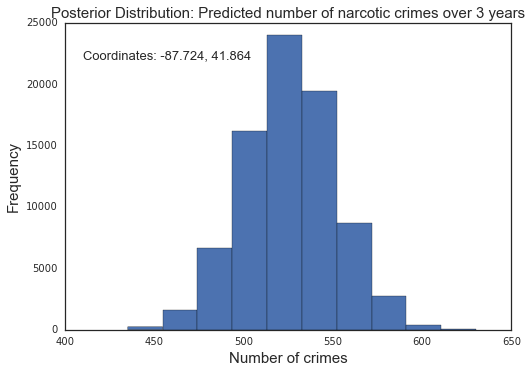

In [717]:
plt.hist(lambdas.trace()[:,1100])
plt.title('Posterior Distribution: Predicted number of narcotic crimes over 3 years',size=15)
plt.xlabel('Number of crimes',size=15)
plt.ylabel('Frequency',size=15)
plt.text(410,22000,'Coordinates: -87.724, 41.864',size=13)
plt.savefig('Posterior_pred.jpg')

Plotting alpha


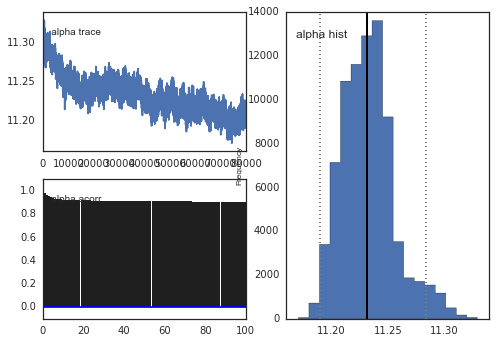

In [718]:
pm.Matplot.plot(alpha, new=False)
plt.savefig('alpha_hist.ps')